Matriz de Confusión:
[[16  0]
 [ 1 18]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.97        19

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



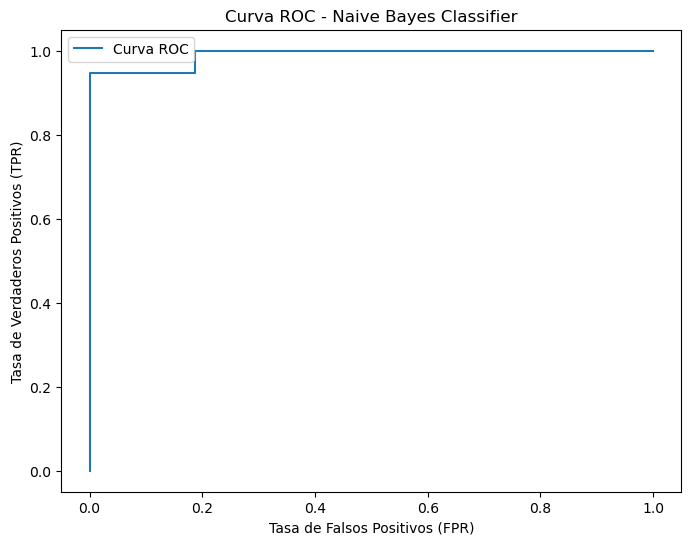

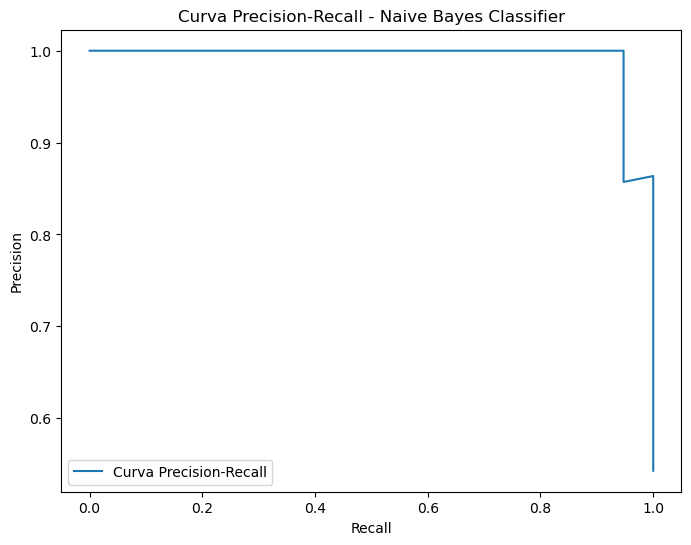

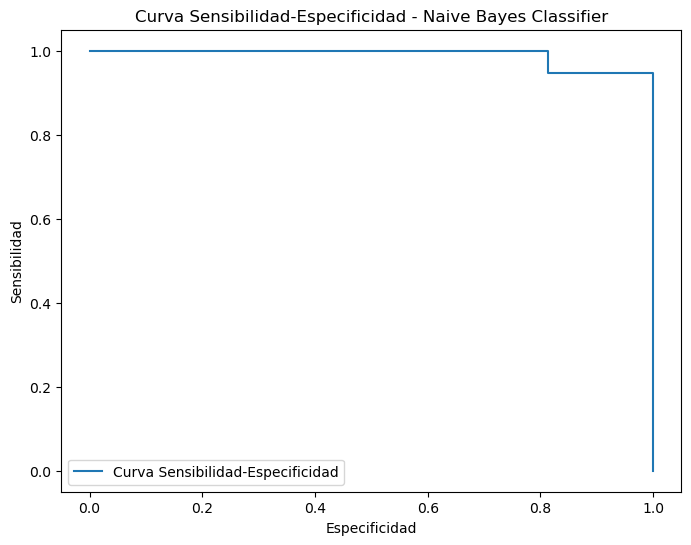

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Lectura de datos
header = ["NAME", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16"]
vote_data = pd.read_csv("D:/Mi unidad/Master FP IA y BD/7RO/R/house-votes-84.data", header=None, names=header, na_values="?")

# Eliminación de filas con valores nulos
vote_data.dropna(inplace=True)

# Convertir las columnas con "yes" y "no" a valores numéricos
for col in vote_data.columns[1:]:
    vote_data[col] = vote_data[col].map({'y': 1, 'n': 0})

# Convertir la columna "NAME" a variables categóricas (democrat o republican)
label_encoder = LabelEncoder()
vote_data["NAME"] = label_encoder.fit_transform(vote_data["NAME"])

# Creación de datos de entrenamiento y prueba
vote_train, vote_test = train_test_split(vote_data, test_size=0.15, random_state=42)

# Creación del clasificador Naive Bayes
X_train = vote_train.iloc[:, 1:]
y_train = vote_train["NAME"]
naive_bayes_classifier = MultinomialNB(alpha=1)
naive_bayes_classifier.fit(X_train, y_train)

# Predicciones en datos de prueba
X_test = vote_test.iloc[:, 1:]
y_test = vote_test["NAME"]
y_pred = naive_bayes_classifier.predict(X_test)

# Matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion_matrix)

# Métricas de rendimiento
print("\nReporte de Clasificación:")
print(metrics.classification_report(y_test, y_pred))

# Curva ROC
probas = naive_bayes_classifier.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probas[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Naive Bayes Classifier')
plt.legend()
plt.show()

# Curva Precision-Recall
precision, recall, _ = metrics.precision_recall_curve(y_test, probas[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Naive Bayes Classifier')
plt.legend()
plt.show()

# Curva Sensibilidad-Especificidad
sens = tpr
spec = 1 - fpr
plt.figure(figsize=(8, 6))
plt.plot(spec, sens, label='Curva Sensibilidad-Especificidad')
plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva Sensibilidad-Especificidad - Naive Bayes Classifier')
plt.legend()
plt.show()